# Advertising Budget and Sales Forecasting

### Analyse which of the variable is more influencing Sales and predict the sales for new data

In [44]:
#import data
import pandas as pd
data = pd.read_excel(r"D:\Suhani\Advertising data.xlsx")
data

,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [45]:
print("Information about the data:",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Day                      200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
Information about the data: None


In [46]:
print("Describing the data:",data.describe())

Describing the data:               Day  TV Ad Budget ($)  Radio Ad Budget ($)  \
count  200.000000        200.000000           200.000000   
mean   100.500000        147.042500            23.264000   
std     57.879185         85.854236            14.846809   
min      1.000000          0.700000             0.000000   
25%     50.750000         74.375000             9.975000   
50%    100.500000        149.750000            22.900000   
75%    150.250000        218.825000            36.525000   
max    200.000000        296.400000            49.600000   

       Newspaper Ad Budget ($)   Sales ($)  
count               200.000000  200.000000  
mean                 30.554000   14.022500  
std                  21.778621    5.217457  
min                   0.300000    1.600000  
25%                  12.750000   10.375000  
50%                  25.750000   12.900000  
75%                  45.100000   17.400000  
max                 114.000000   27.000000  


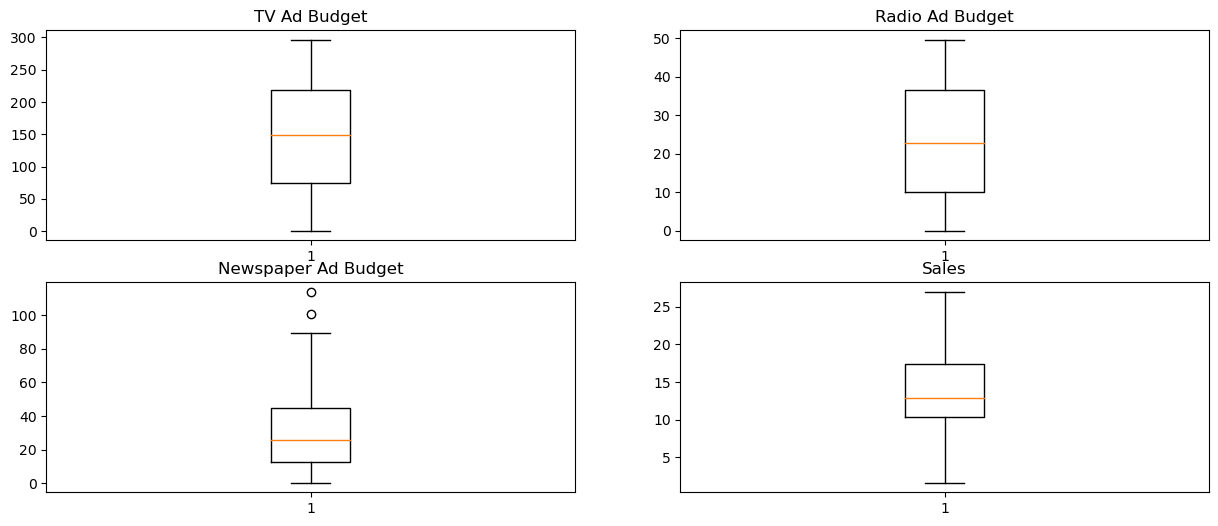

In [47]:
#detecting the presence of outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))

plt.subplot(2,2,1)
plt.boxplot(data["TV Ad Budget ($)"])
plt.title("TV Ad Budget")

plt.subplot(2,2,2)
plt.boxplot(data["Radio Ad Budget ($)"])
plt.title("Radio Ad Budget")

plt.subplot(2,2,3)
plt.boxplot(data["Newspaper Ad Budget ($)"])
plt.title("Newspaper Ad Budget")

plt.subplot(2,2,4)
plt.boxplot(data["Sales ($)"])
plt.title("Sales")

plt.show()

In [48]:
#Identify the outliers
import numpy as np
sort_newspaper = np.sort(data["Newspaper Ad Budget ($)"])
for i in sort_newspaper:
    if i > 90:
        print(i)
print(sort_newspaper)

100.9
114.0
[  0.3   0.9   1.    1.7   1.8   2.1   2.2   2.4   3.2   3.6   3.6   3.7
   4.    5.    5.3   5.4   5.5   5.7   5.8   5.9   6.    6.    6.4   6.4
   7.2   7.4   7.4   8.1   8.3   8.4   8.5   8.5   8.7   8.7   8.7   9.
   9.2   9.3   9.3   9.3   9.4   9.5  10.2  10.7  10.9  11.   11.6  11.9
  12.4  12.6  12.8  12.9  13.1  13.1  13.8  14.2  14.2  14.8  15.6  15.9
  16.   16.6  17.   17.6  17.9  18.2  18.3  18.3  18.4  18.5  19.1  19.3
  19.4  19.5  19.6  20.3  20.5  20.6  20.7  21.2  21.4  21.4  21.6  22.
  22.3  22.3  22.9  22.9  23.1  23.2  23.2  23.4  23.5  23.5  23.7  24.2
  24.3  25.6  25.6  25.6  25.9  26.2  26.4  26.6  27.2  27.3  27.4  28.9
  29.7  29.7  30.   30.   30.7  31.3  31.5  31.6  31.6  31.7  32.   32.5
  33.   33.8  34.4  34.5  34.6  34.6  35.1  35.2  35.6  35.7  36.8  36.9
  37.   37.7  37.7  37.9  38.6  38.7  38.7  38.9  39.6  40.8  41.4  41.8
  43.   43.1  43.2  43.3  44.3  45.1  45.1  45.2  45.7  45.9  46.   46.2
  47.4  48.7  49.3  49.6  49.8  49.9  50.

In [49]:
#Trimming of data
new_data = data[data["Newspaper Ad Budget ($)"]<90]
print("new_data shape:",new_data.shape)
new_data_sort=new_data.sort_values("Newspaper Ad Budget ($)")
new_data_sort

new_data shape: (198, 5)


,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
33,34,265.6,20.0,0.3,17.4
65,66,69.0,9.3,0.9,9.3
8,9,8.6,2.1,1.0,4.8
139,140,184.9,43.9,1.7,20.7
42,43,293.6,27.7,1.8,20.7
...,...,...,...,...,...
5,6,8.7,48.9,75.0,7.2
141,142,193.7,35.4,75.6,19.2
118,119,125.7,36.9,79.2,15.9
165,166,234.5,3.4,84.8,11.9


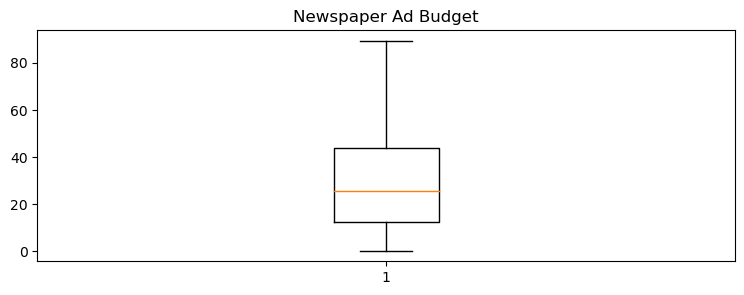

In [50]:
#Check for outliers in new_data["Newspaper Ad Budget ($)"]
plt.figure(figsize=(9,3))
plt.boxplot(new_data["Newspaper Ad Budget ($)"])
plt.title("Newspaper Ad Budget")
plt.show()

In [51]:
#Correlation of Sales with corresponding independent variable
print("Correlation of Sales and Independent variables:")
new_data.corr()

Correlation of Sales and Independent variables:


,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
Day,1.000000,0.010991,-0.105193,-0.137040,-0.054703
TV Ad Budget ($),0.010991,1.000000,0.051978,0.049771,0.779121
Radio Ad Budget ($),-0.105193,0.051978,1.000000,0.346364,0.576748
Newspaper Ad Budget ($),-0.137040,0.049771,0.346364,1.000000,0.219555
Sales ($),-0.054703,0.779121,0.576748,0.219555,1.000000


In [52]:
#Trimed data
X = new_data.drop(['Day','Sales ($)'], axis=1)
y_1 = new_data['Sales ($)']

In [54]:
#OLS regression result
import statsmodels.api as sm
X_1 = sm.add_constant(X)
model1 = sm.OLS(y_1,X_1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sales ($)   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           8.35e-95
Time:                        11:12:58   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.9523      0.318      9.280      0.000       2.325       3.580
TV Ad Budget ($)            0.0457      0.001     32.293      0.000       0.043       0.048
Radio Ad Budget ($)         0.1886      0.009     21.772      0.000       0.171       0.206
Newspaper Ad Budget ($)    -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the above result it is clear that Adj. R-squared is 0.894. This means that approximately 90% of the total variation in the data can be explained by the model. This also means that the model doesnot account for 10% of the data. This may be due to noice or missing variable.

### Since p-values(Prob (F-statistic)=8.35e-95) is close to zero, there is atleast one predictor in the model that is a good predictor of sales

### If you look at the column, P>|t|, you can see the p_values for each predictor. The p_value of Newspaper Ad budget is 0.852, which indicates that spending on Newspaper Ad has very less on sales. 

In [55]:
#build models for trimmed data
from sklearn.linear_model import Ridge
model_ = Ridge()
model_.fit(X_1,y_1)
print("With respect to Ridge regression:")
print(model_.coef_)
print(model_.intercept_)


from sklearn.linear_model import Lasso
model_1 = Lasso()
model_1.fit(X_1,y_1)
print("With respect to Lasso Rigression:")
print(model_1.coef_)
print(model_1.intercept_)

With respect to Ridge regression:
[ 0.          0.04569034  0.18854554 -0.00117641]
2.9523855333135156
With respect to Lasso Rigression:
[0.         0.04558458 0.18347063 0.        ]
3.050255161266488


In [56]:
#Split the data into training data set and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_1,random_state=45,test_size=0.1)

In [57]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (178, 3)
Shape of X_test: (20, 3)
Shape of y_train: (178,)
Shape of y_test: (20,)


In [58]:
from sklearn.ensemble import RandomForestRegressor
r_forest = RandomForestRegressor()
r_forest.fit(X_train,y_train)

y_train_pred = r_forest.predict(X_train)

y_test_pred = r_forest.predict(X_test)

In [59]:
y_train_pred - y_train

135    0.036
159    0.047
36    -0.126
158   -0.282
187    0.520
       ...  
96     0.023
33    -0.558
126   -0.089
133   -0.007
160   -0.068
Name: Sales ($), Length: 178, dtype: float64

In [60]:
from sklearn.metrics import r2_score

r2_score_train_data = r2_score(y_train_pred,y_train)
print("R2 value of training data:",r2_score_train_data)

n1=len(X_train)
k1=X_train.shape[1]
adj_r2_training = 1 - ((1-r2_score_train_data)*(n1-1)/(n1-k1-1))
print("Adjusted Rsquare of Training data:",adj_r2_training)

R2 value of training data: 0.9971973782228456
Adjusted Rsquare of Training data: 0.9971490571577223


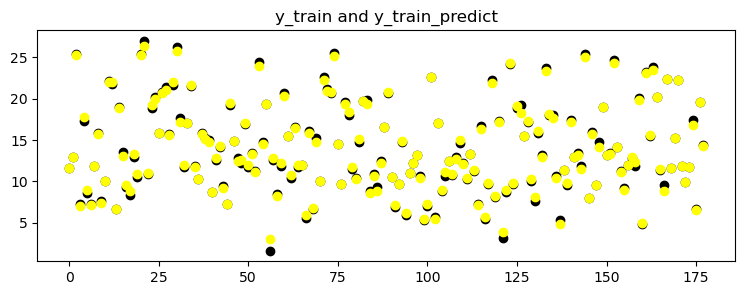

In [61]:
plt.figure(figsize=(9,3))
plt.scatter(range(len(y_train)),y_train,color="black")
plt.scatter(range(len(y_train_pred)),y_train_pred,color="yellow")
plt.title("y_train and y_train_predict")
plt.show()


In [62]:
#calculate rsquare and MSE for test data
r2_score_test_data = r2_score(y_test_pred,y_test)
print("R2 value of training data:",r2_score_test_data)

n2=len(X_test)
k2=X_test.shape[1]
adj_r2_testing = 1-((1-r2_score_test_data)*(n2-1)/(n2-k2-1))
print("Adjusted Rsquare of Testing data:",adj_r2_testing)

R2 value of training data: 0.9487432814628992
Adjusted Rsquare of Testing data: 0.9391326467371928


In [66]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X, y_1)

y_train_pred1 = svr.predict(X_train)

y_test_pred1 = svr.predict(X_test)

In [67]:
#calculate rsquare and MSE for test data
r2_score_test_data = r2_score(y_test_pred1,y_test)
print("R2 value of training data:",r2_score_test_data)

n2=len(X_test)
k2=X_test.shape[1]
adj_r2_testing = 1-((1-r2_score_test_data)*(n2-1)/(n2-k2-1))
print("Adjusted Rsquare of Testing data:",adj_r2_testing)

R2 value of training data: 0.8249901797291047
Adjusted Rsquare of Testing data: 0.7921758384283119


In [68]:
#predicting for new data
new_data=(204.1,32.9,46)

#convert it into array
import numpy as np
new_data_=np.asarray(new_data)

#reshape the data
new_data_reshape=new_data_.reshape(1,-1)

#fit new_data to the regressor
new_data_predict=r_forest.predict(new_data_reshape)
print(new_data_predict)

[18.961]


C:\Users\HEMA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
